# RDataScience Oreilly

### Descripción
Estas son los notas mas importantes que puede obtener del libro, con la finalidad de tener un resumen de los puntos mas importantes.


### Note how can Resizing plots in the R kernel for Jupyter notebooks
https://blog.revolutionanalytics.com/2015/09/resizing-plots-in-the-r-kernel-for-jupyter-notebooks.html

    library(repr)

    # Change plot size to 4 x 3
    options(repr.plot.width=4, repr.plot.height=3)
    
### Note2 Generate a table 
https://www.tablesgenerator.com/markdown_tables


### Note 3 - DataFrames

In [14]:
library(tidyverse)
library(ggplot2)
#these packages provides data on flights, world development and basaball
library(nycflights13)
library(gapminder)
library(Lahman)

library(gridExtra) #multiple grid
library(repr) # Change plot size to 4 x 3

#other packages that need install
#install.packages("nycflights13")
#install.packages("Lahman")

## Part 1 Explore

### Chapter 1 -  Data Visualization with ggplot 2 (pag. 29)

#### <font color='blue'>---First steps (pag. 3 to 16) ---</font>

Basicamentes empezamos con ggplot, pues basicamente nos van a dar una introducción con herramientas que nos motiven a continuar, en general esteremos trabajando con la data disponible en `mpg` en primera instancia graficamos: 

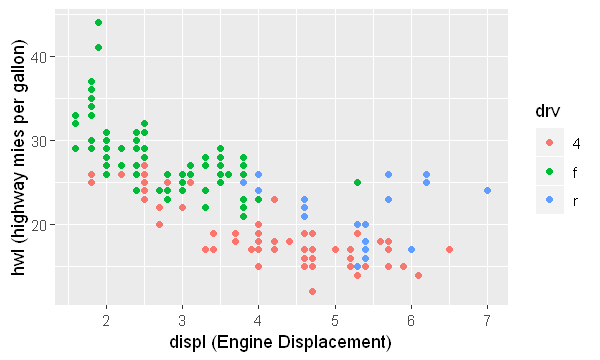

In [15]:
#ibrary(repr)
# Change plot size to 4 x 3
options(repr.plot.width=5, repr.plot.height=3)

data(mpg)
ggplot(data = mpg) + geom_point(aes(x = displ, y = hwy, color = drv)) + 
  ylab("hwl (highway mies per gallon)") + 
  xlab("displ (Engine Displacement)")

De esta empezamos a realizar algunos cambios manuales con la finalidad de poder ver el potencia de las `geom` en R y como cada una de ellas pueden mapear o incluso filtrar lo datos entre las modificaciones destacan :

  - Usar el aes en la variable global: 
`ggplot(data = mpg, aes(x = displ, y = hwy) + geom_point(color = drv))`
  - Si se define alguna variable de manera manual por ejemplo el color esta va afuera del aes() i.e : 
`ggplot(data = mpg) + geom_point(aes(x = displ, y = hwy), color = "blue") + ` de lo contrario este no funcionara.
  - podemos llamar a una función especifica de un paquete con `package()::function()` e.g `ggplo2::ggplot() or ggplot2::mpg`
  - podemos dividir las graficas con `facetes` solomente debemos utilizar `facet_wrap()`
  - uso de `group` muchas `geom` como `geom_smooth` usa una unica objecto geometrico  para desplegar multlipes registros, para ellos tu puedes definir un grupo `(group)` aesthetic para dibujar multiples objetos de una variable categorica 
  

`geom_smooth()` using method = 'loess' and formula 'y ~ x'
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


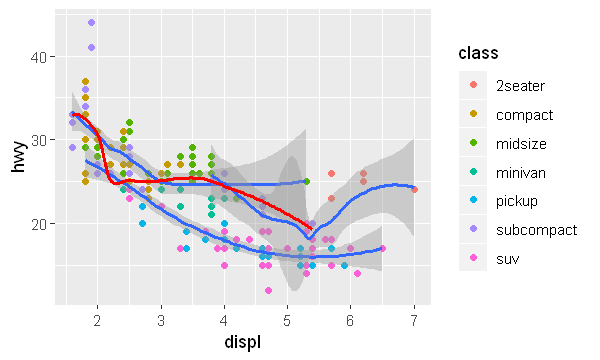

In [16]:
# Change plot size to n x m
options(repr.plot.width=5, repr.plot.height=3)


ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) +
  geom_point(mapping = aes(color = class)) +
  geom_smooth(mapping = aes(x = displ, y = hwy, group = drv)) +
  geom_smooth(
    data = filter(mpg, class == "subcompact"),
    se = FALSE
    , color = "red"
  )


#### <font color='blue'>---Stastical Transformation (pag. 22) ---</font>

Ahora estaremos trabajando con las estadisticas or `stat (statistical transformation)` en R las cuales son algoritmos usados para calcular nuevos valores para las graficas,puedes saber qué estadística usa una `geom` inspeccionando el valor predeterminado para la `stat` por ejemplo `?geom_bar` muestra el valor default para `stat` is `count`(contar), lo cual significa que `geom_bar` usa `stat_count()` es importante mencionar que se puede usar de manera intercambiable `geom` y `stat`.


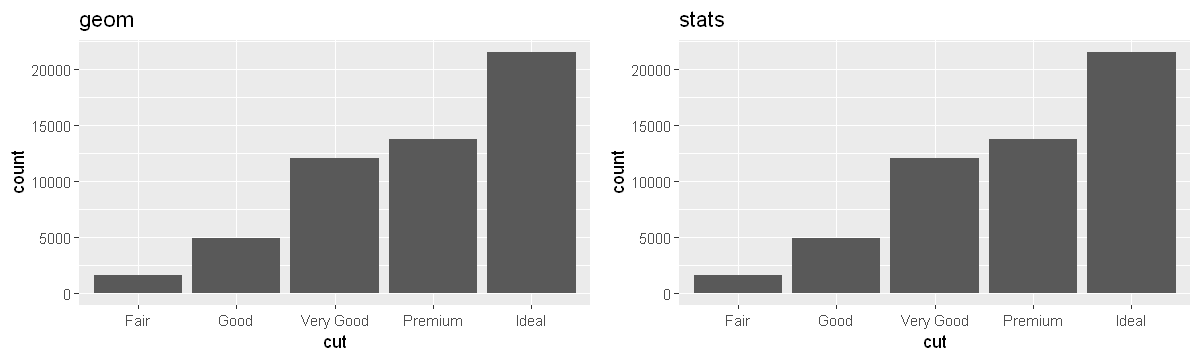

In [17]:
#library(repr)
# Change plot size to n x m


data(diamonds)
#Grafica con geom
a1<-ggplot(diamonds, aes(x = cut)) + geom_bar() + labs(title = "geom")

#grafica con stat
a2<-ggplot(diamonds, aes(x = cut)) + stat_count() + labs(title = "stats")

options(repr.plot.width=10, repr.plot.height=3)
grid.arrange(a1, a2, ncol = 2)

Existen 3 razanos por la cual se desea cambiar el comportamiento default que tiene `geom` in R las cuales son :

1. Sobreescribir el comportamiento default de `geom`, por ejemplo cambiar en `geom_bar` de contar (default) a `identity` me permite mapear el valor puro de las barras a la variable `y`, nota si ententara  `ggplot(demo, aes(x = a, y = b)) + geom_bar()`
2. Sobreescribir el `mapping` (asginación) default  de las variables transformadas a la estetica, por ejemplo ver la grafica en proporciones en vez de el conteo. Nota: **To find the variables computed by the stat, look for the help section
titled “Computed variables.”**
3. Es posible que desee llamar más la atención sobre la transformación estadística en su código, por ejemplo sumarizar sobre las variables `y` para valor unico de `x`

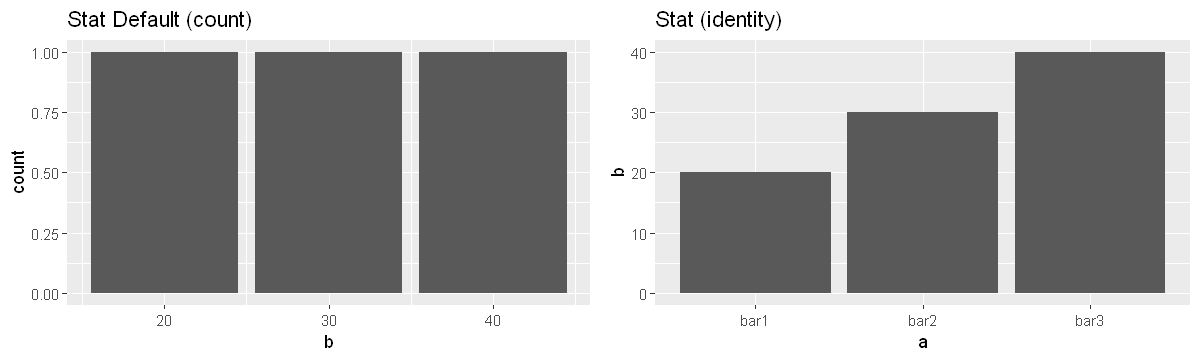

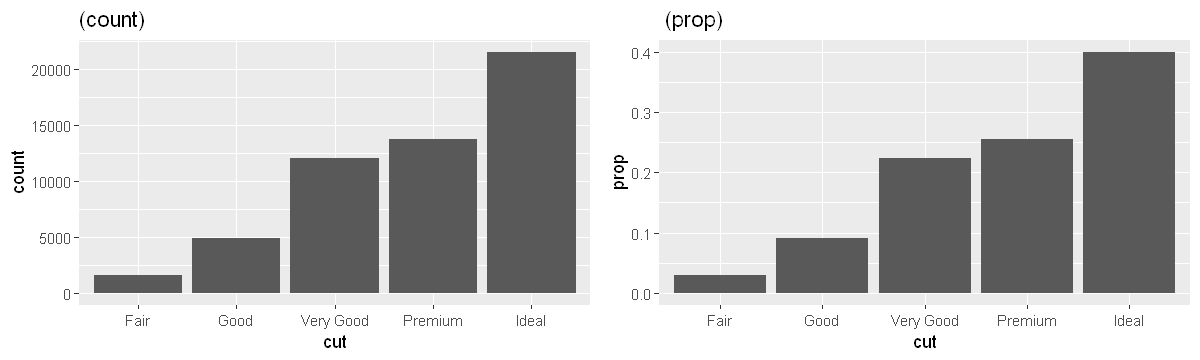

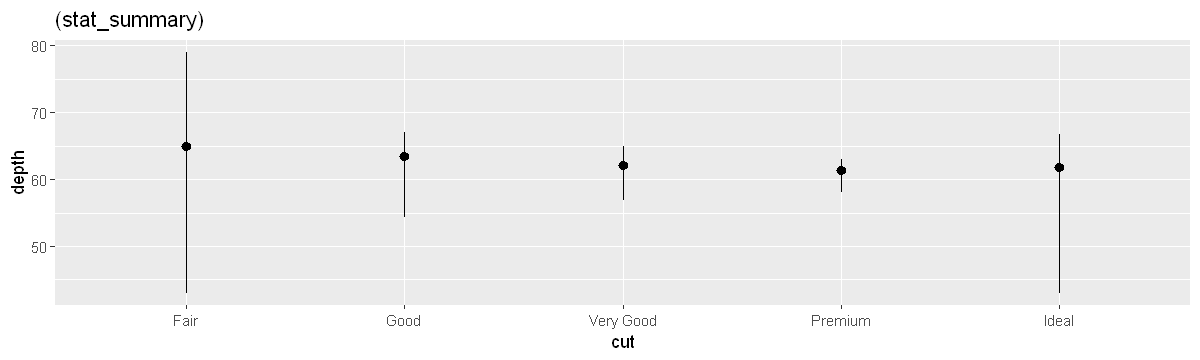

In [18]:
#library(repr)
# Change plot size to n x m
options(repr.plot.width=10, repr.plot.height=3)

#Ejemplo1 

demo<- tribble(~a,~b,
               "bar1",20,
               "bar2",30,
               "bar3",40)
default<-ggplot(demo, aes(x = b)) + geom_bar() + labs(title = "Stat Default (count)")

identity<-ggplot(demo, aes(x = a, y = b)) + geom_bar(stat = "identity") + labs(title = "Stat (identity)")

grid.arrange(default, identity, ncol = 2)

#Ejemplo2 
data(diamonds)
a1<-ggplot(diamonds, aes(x = cut)) + geom_bar() + labs(title = "(count)")
a2<-ggplot(diamonds, aes(x = cut, y = ..prop.., group = 1)) + geom_bar() + labs(title = " (prop)")

grid.arrange(a1, a2, ncol = 2)


#Ejemplo 3 

ggplot(data = diamonds) +
stat_summary(
mapping = aes(x = cut, y = depth),
fun.ymin = min,
fun.ymax = max,
fun.y = median
) + labs(title = "(stat_summary)")

#### <font color='blue'>---Layer: stats (Extra) ---</font>
A handful of layers are more easily specified with a stat_ function, drawing attention to the statistical transformation rather than the visual appearance. The computed variables can be mapped using stat().

`stat_ecdf()` Compute empirical cumulative distribution

`stat_ellipse()` Compute normal confidence ellipses

`stat_function()` Compute function for each x value

`stat_identity()` Leave data as is

`stat_summary_2d()` & `stat_summary_hex()` Bin and summarise in 2d (rectangle & hexagons)

`stat_summary_bin()` & `stat_summary()` Summarise y values at unique/binned x

`stat_unique()` Remove duplicates

`stat_sf_coordinates()` Extract coordinates from 'sf' objects

`stat()` Calculated aesthetics


#### <font color='blue'>---Position Adjusments (pag. 27) ---</font>


All layers have a position adjustment that resolves overlapping geoms. Override the default by using the position argument to the `geom_` or `stat_` function.

	
`position_dodge()` and  `position_dodge2()` :Dodge overlapping objects side-to-side

`position_identity()`: Don't adjust position

`position_jitter()`: Jitter points to avoid overplotting

`position_jitterdodge()`: Simultaneously dodge and jitter

`position_nudge()`: Nudge points a fixed distance

`position_stack()` &  `position_fill()` Stack overlapping objects on top of each another


#### <font color='blue'>---Coordinate Systems (pag. 31) ---</font>

Coordinate systems are probably the most complicated part of ggplot2. The default coordinate system is the Cartesian coordinate
system where the x and y position act independently to find the location of each point. There are a number of other coordinate systems that are occasionally helpful:

`coord_flip()` switches the x- and y-axes. This is useful (for example) if you want horizontal boxplots. It’s also useful for long labels for example.
`coord_polar()` uses polar coordinates. Polar coordinates revealan interesting connection between a bar chart and a Coxcomb


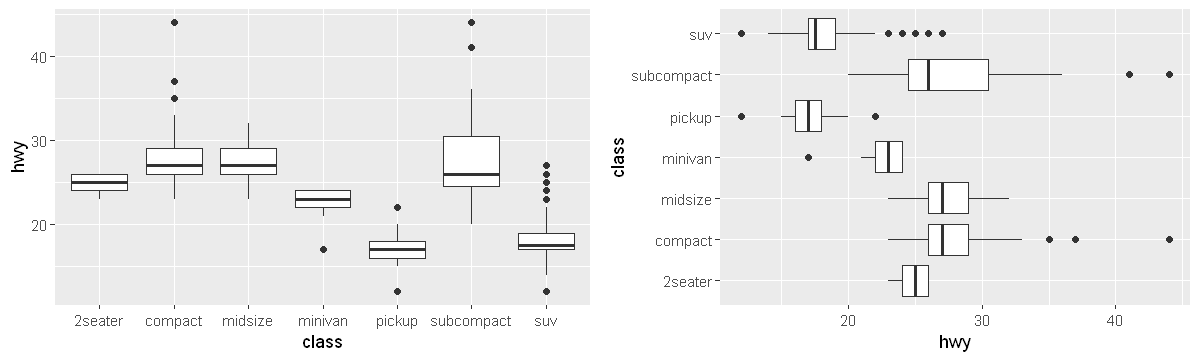

In [19]:
#library(repr)
# Change plot size to n x m
options(repr.plot.width=10, repr.plot.height=3)

#coord_flip()

a1<-ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_boxplot()
a2<-ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_boxplot() + coord_flip()

grid.arrange(a1, a2, ncol = 2)

### Chapter 2 -  Workflow: Basic (pag. 37)
this chapter we only saw how variables can be declared and how they can be called, of course, some we need :

    # nycflights13::flights.
    data(flights)
    head(flights)
 
### Chapter 3 - Data Tranformation with dplyr (pag. 43)
In this chapter we’re going to focus on how to use the dplyr package, another core member of the tidyverse

    library(tidyverse)

Take careful note of the conflicts message that’s printed when you load the tidyverse. It tells you that dplyr overwrites some functions in base R. If you want to use the base version of these functions after loading dplyr, you’ll need to use their full names: `stats::filter()` and `stats::lag()`

**dplyr Basics** In this chapter you are going to learn the five key dplyr functions that allow you to solve the vast majority of your data-manipulation challenges:

- Pick observations by their values (`filter()`).
- Reorder the rows (`arrange()`).
- Pick variables by their names (`select()`).
- Create new variables with functions of existing variables (`mutate()`).
- Collapse many values down to a single summary (`summarize()`).   
    
These can all be used in conjunction with `group_by()`, which changes the scope of each function from operating on the entire dataset to operating on it group-by-group.

#### <font color='blue'>---Missing Values (Extra) ---</font>

One important feature of R that can make comparison tricky is missing values, or NAs (“not availables”). NA represents an unknown value so missing values are “contagious”; If you want to determine if a value is missing, use is.na():

In [20]:
array_NA<-c(1,2,NA,3,5)
is.na(array_NA)

[1] FALSE FALSE  TRUE FALSE FALSE

#### <font color='blue'>---Arrange Rows with arrange() (pag. 50 ) ---</font>
arrange() works similarly to filter() except that instead of selecting rows, it changes their order. It takes a data frame and a set of column names (or more complicated expressions) to order by. If you provide more than one column name, each additional column will be used to break ties in the values of preceding columns:

    arrange(flights, year, month, day)
    
Use `desc()` to reorder by a column in descending order:

    arrange(flights, desc(arr_delay))
    
**Note**: Missing values are always sorted at the end


#### <font color='blue'>---Grouped Summaries with summarize(pag. 59)) ---</font>
The last key verb is summarize(). It collapses a data frame to a single row:

    summarize(flights, delay = mean(dep_delay, na.rm = TRUE))
    
summarize() is not terribly useful unless we pair it with group_by(). This changes the unit of analysis from the complete dataset to individual groups.

    by_day <- group_by(flights, year, month, day)
    summarize(by_day, delay = mean(dep_delay, na.rm = TRUE))

#### <font color='blue'>---Combining Multiple Operations with the Pipe(Extra) ---</font>
Behind the scenes, `x %>% f(y)` turns into `f(x, y)`, and `x %>% f(y) %>% g(z)` turns into `g(f(x, y), z)`, and so on. You can use the pipe to rewrite multiple operations in a way that you can read left-toright, top-to-bottom.


#### <font color='blue'>---Ungrouping (Extra) ---</font>
If you need to remove grouping, and return to operations on ungrouped data, use ungroup():

    daily %>%
    ungroup() %>% # no longer grouped by date
    summarize(flights = n()) # all flights
    

### Chapter 4 - Script (pag. 77) 

### Chapter 5 -  Exploratory Data Analysis (EDA) (pag. 81)

#### <font color='blue'>---Variation(pag. 83)) ---</font>
*Variation* is the tendency of the values of a variable to change from measurement to measurement.

#### <font color='blue'>---Visualizing Distributions(Extra)) ---</font>
How you visualize the distribution of a variable will depend on whether the variable is 

- **Categorical**, use barchart
- **Continuous**, 
    - use a histogram
    - If you wish to overlay multiple histograms in the same plot, I recommend using `geom_freqpoly()` instead of `geom_histogram()`. geom_freqpoly() performs the same calculation as geom_histo gram(), but instead of displaying the counts with bars, uses lines instead.

cut,n
Fair,1610
Good,4906
Very Good,12082
Premium,13791
Ideal,21551


"cut_width(carat, 0.5)",n
"[-0.25,0.25]",785
"(0.25,0.75]",29498
"(0.75,1.25]",15977
"(1.25,1.75]",5313
"(1.75,2.25]",2002
"(2.25,2.75]",322
"(2.75,3.25]",32
"(3.25,3.75]",5
"(3.75,4.25]",4
"(4.25,4.75]",1


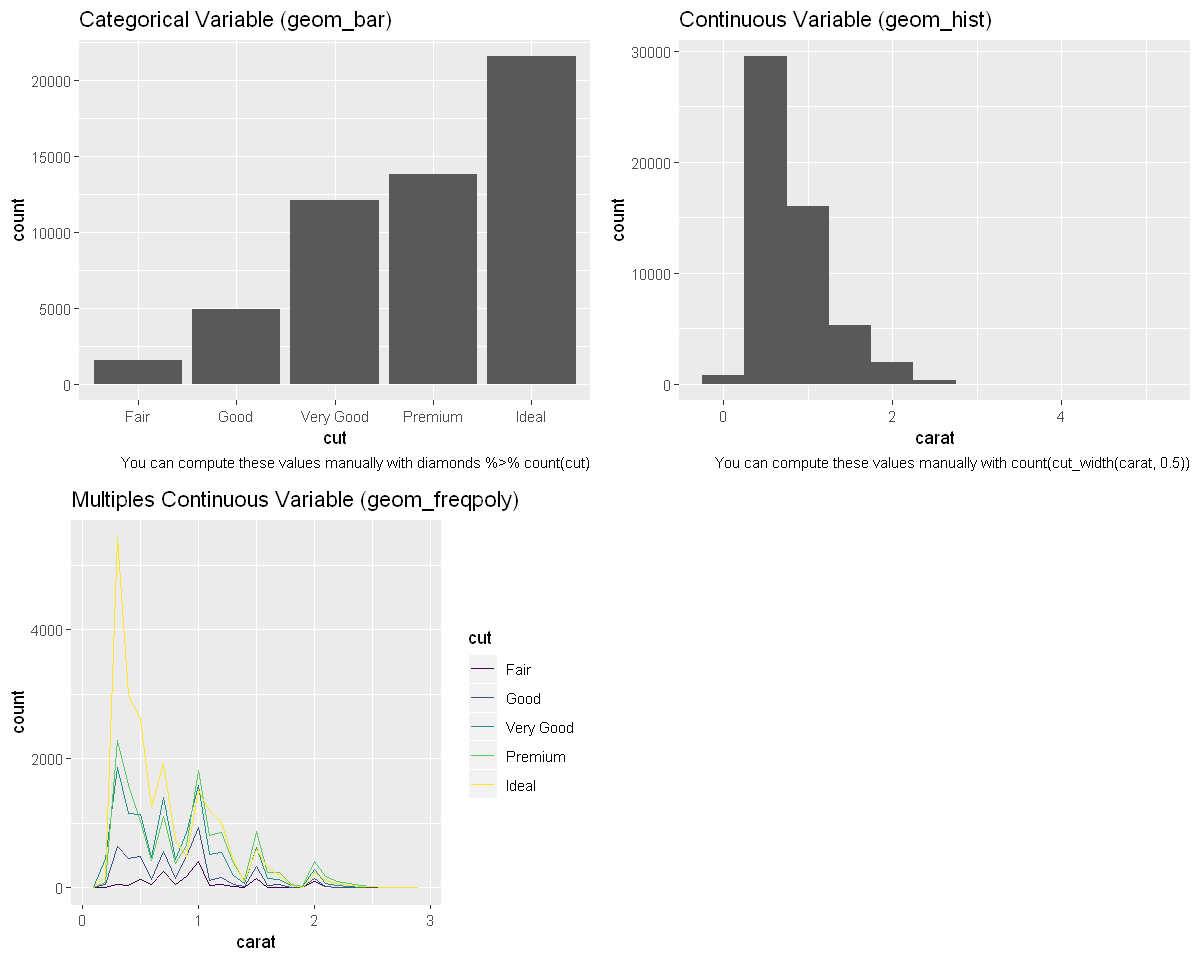

In [21]:
data("diamonds")

#Categorical Variable
a1<-ggplot(diamonds, aes(x = cut)) + geom_bar() + 
labs(title = "Categorical Variable (geom_bar)" , 
     caption = "You can compute these values manually with diamonds %>% count(cut)")

#You can compute these values manually with dplyr::count():
diamonds %>% count(cut)


#Continuous Variable
a2<-ggplot(diamonds, aes(x = carat)) + geom_histogram(binwidth = .5) + 
labs(title = "Continuous Variable (geom_hist)" , 
     caption = "You can compute these values manually with count(cut_width(carat, 0.5))" )

#You can compute this by hand by combining dplyr::count() and ggplot2::cut_width():
diamonds %>% count(cut_width(carat, 0.5))




#multiples Continuous Variable
smaller <- diamonds %>% filter(carat < 3)
a3<-ggplot(data = smaller, mapping = aes(x = carat, color = cut)) + geom_freqpoly(binwidth = 0.1) + 
labs(title = "Multiples Continuous Variable (geom_freqpoly)")



options(repr.plot.width=10, repr.plot.height=8)
grid.arrange(a1, a2, a3, ncol = 2)

#### <font color='blue'>---Covariation (pag. 93 )) ---</font>

If variation describes the behavior within a variable, covariation describes the behavior between variables. Covariation is the tendency for the values of two or more variables to vary together in a related way.The best way to spot covariation is to visualize the relationship between two or more variables. How you do that should again depend on the type of variables involved.

#### <font color='blue'>--- A Categorical and Continuous Variable (Extra)) ---</font> 
- `geom_freqpoly()` but Instead of displaying count, we’ll display density, which is the count standardized so that the area under each frequency polygon is one
- A `boxplots` a type of visual shorthand for a distribution of values that is popular among statisticians

but sometime it's hard to see some patterns,so we will recommend sort out data, in the second example we will use `reorder()` and if you have problem with the `x` label's names, you can flip 90°


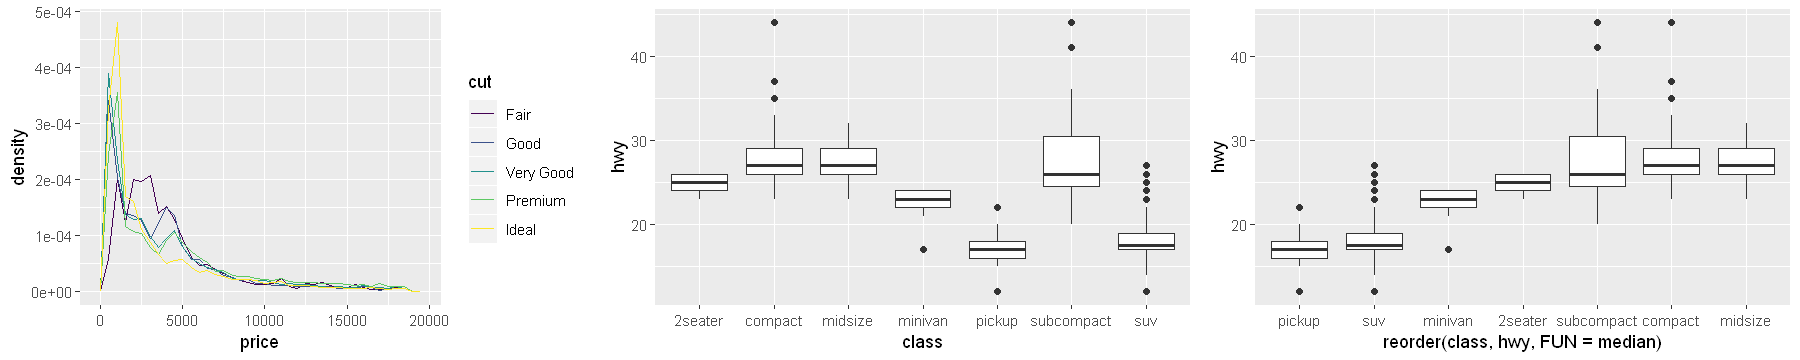

In [26]:

a1<-ggplot(data = diamonds,mapping = aes(x = price, y = ..density..)) +
geom_freqpoly(mapping = aes(color = cut), binwidth = 500)

a2<-ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + geom_boxplot()

a3<-ggplot(data = mpg) + geom_boxplot(mapping = aes(x = reorder(class, hwy, FUN = median), 
                                                    y = hwy)
                                     )

options(repr.plot.width=15, repr.plot.height=3)
grid.arrange(a1, a2,a3, nrow = 1)


#### <font color='blue'>--- Two Categorical Variables (Extra) ---</font>  
To visualize the covariation between categorical variables, you’ll need to count the number of observations for each combination. One way to do that is to rely on the built-in `geom_count()` but Another approach is to compute the `count` with dplyr and visualize with geom_tile() and the fill aesthetic e.g 


color,cut,n
D,Fair,163
D,Good,662
D,Very Good,1513
D,Premium,1603
D,Ideal,2834
E,Fair,224


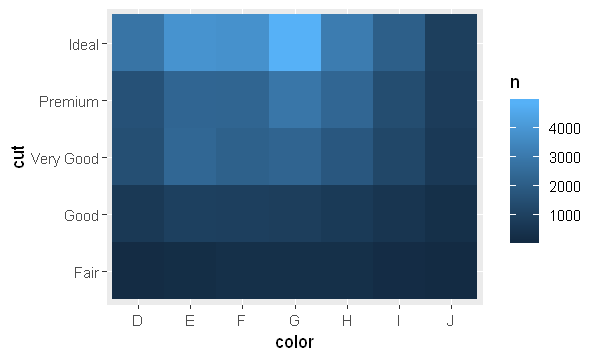

In [23]:
options(repr.plot.width=5, repr.plot.height=3)

head (diamonds %>% count(color, cut)) 

diamonds %>% count(color, cut) %>% ggplot(mapping = aes(x = color, y = cut)) + 
geom_tile(mapping = aes(fill = n))



#### <font color='blue'>--- Two Continuous Variables (Extra) ---</font>  
You’ve already seen one great way to visualize the covariation between two continuous variables: draw a scatterplot with `geom_point()`.

### Chapter 6 - Workflow: Projects (pag. 111)

#### <font color='blue'> --- Recommendations --- </font>

We recommend that your RStudio not to preserve your workspace between session to do that you need `Options/R General/Restore .RData on exit = Never`

you need memorize some instructions very important

- `getwd` : current direcotory
- `setwd` : change or define new directory
- **Paths** Mac and Linux use slashes (e.g., `plots/diamonds.pdf`) and Windows uses backslashes (e.g., `plots\diamonds.pdf`). R can work with either type (no matter what platform you’re currently using), but unfortunately, **backslashes** mean something special to R, and to get a single backslash in the path, you need to type **two backslashes**
- The last minor difference is the place that `~` points to `.~` is a convenient shortcut to your home directory.
